<a href="https://colab.research.google.com/github/Sirius-Comet/Algo22/blob/main/Welding_Defect_Accuracy%20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import zipfile
import os

# Hubungkan ke Google Drive
drive.mount('/content/drive')

# Path ke file ZIP di Google Drive
zip_path = '/content/drive/My Drive/Dataset/RIAWELC-main.zip'

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Ekstrak di direktori Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install patool # Install the patool package which includes patoolib

import zipfile
import patoolib
import os

# Ekstrak ZIP utama
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Ekstrak partisi RAR secara bersamaan di dalam folder 'Dataset_partitioned'
part_dir = '/content/RIAWELC-main/Dataset_partitioned/'
part_rars = [f'{part_dir}/RIAWELC_dataset.part{str(i).zfill(2)}.rar' for i in range(1, 20)]

# Ekstrak semua part RAR ke dalam folder tujuan
target_dir = '/content/RIAWELC_dataset/'
patoolib.extract_archive(part_rars[0], outdir=target_dir)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.2 MB/s eta 0:00:00


INFO patool: Extracting /content/RIAWELC-main/Dataset_partitioned//RIAWELC_dataset.part01.rar ...
INFO:patool:Extracting /content/RIAWELC-main/Dataset_partitioned//RIAWELC_dataset.part01.rar ...
INFO patool: ... creating output directory `/content/RIAWELC_dataset/'.
INFO:patool:... creating output directory `/content/RIAWELC_dataset/'.
INFO patool: running /usr/bin/unrar x -kb -or -- /content/RIAWELC-main/Dataset_partitioned/RIAWELC_dataset.part01.rar
INFO:patool:running /usr/bin/unrar x -kb -or -- /content/RIAWELC-main/Dataset_partitioned/RIAWELC_dataset.part01.rar
INFO patool: ... /content/RIAWELC-main/Dataset_partitioned//RIAWELC_dataset.part01.rar extracted to `/content/RIAWELC_dataset/'.
INFO:patool:... /content/RIAWELC-main/Dataset_partitioned//RIAWELC_dataset.part01.rar extracted to `/content/RIAWELC_dataset/'.


'/content/RIAWELC_dataset/'

Found 15863 images belonging to 4 classes.
Found 6101 images belonging to 4 classes.
Found 2443 images belonging to 4 classes.


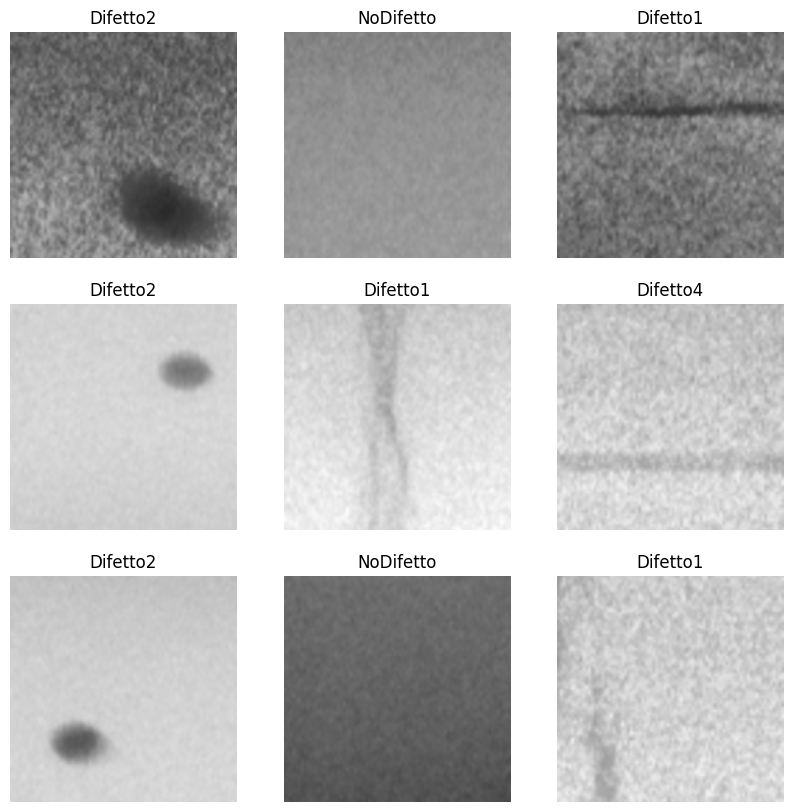

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# ImageDataGenerator untuk memuat gambar dari direktori
img_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(rescale=1./255)

# Update target_dir to the correct path after extraction
target_dir = '/content/RIAWELC_dataset'

# Load data dari masing-masing folder, update paths based on dataset structure
train_generator = datagen.flow_from_directory(
    os.path.join(target_dir, 'DB - Copy/training'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    os.path.join(target_dir, 'DB - Copy/validation'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    os.path.join(target_dir, 'DB - Copy/testing'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Visualisasi beberapa sampel gambar
def plot_samples(generator):
    class_labels = list(generator.class_indices.keys())
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        # Use next(generator) instead of generator.next()
        img, label = next(generator)
        plt.imshow(img[0])
        plt.title(class_labels[np.argmax(label[0])])
        plt.axis('off')
    plt.show()

# Tampilkan sampel gambar dari data training
plot_samples(train_generator)

Found 12692 images belonging to 4 classes.
Found 1219 images belonging to 4 classes.
Found 2443 images belonging to 4 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


397/397 ━━━━━━━━━━━━━━━━━━━━ 203s 475ms/step - accuracy: 0.7093 - loss: 0.7980 - val_accuracy: 0.7342 - val_loss: 0.6653
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 187s 455ms/step - accuracy: 0.8329 - loss: 0.4335 - val_accuracy: 0.7342 - val_loss: 0.6885
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 202s 455ms/step - accuracy: 0.8592 - loss: 0.3647 - val_accuracy: 0.7482 - val_loss: 0.7249
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 199s 443ms/step - accuracy: 0.8743 - loss: 0.3359 - val_accuracy: 0.7424 - val_loss: 0.7266
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 182s 453ms/step - accuracy: 0.8668 - loss: 0.3424 - val_accuracy: 0.7818 - val_loss: 0.6465
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 177s 439ms/step - accuracy: 0.8791 - loss: 0.3175 - val_accuracy: 0.7621 - val_loss: 0.7143
Epoch 7/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 201s 437ms/step - accuracy: 0.8891 - loss: 0.2855 - val_accuracy: 0.7588 - val_loss: 0.6410
Epoch 8/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 178s 443ms/step - accuracy: 0.8949 - loss: 0.28

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,205,518 (23.67 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,631,690 (10.04 MB)

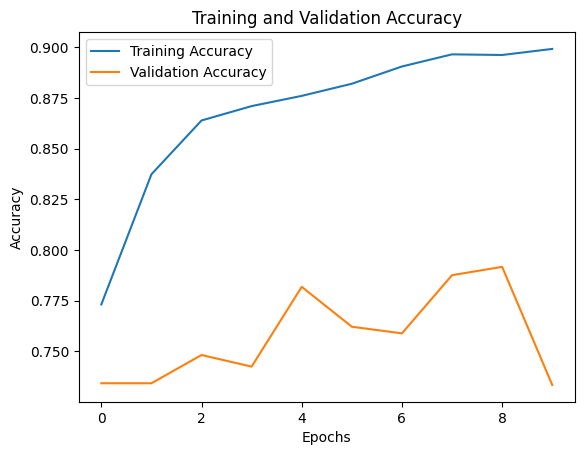

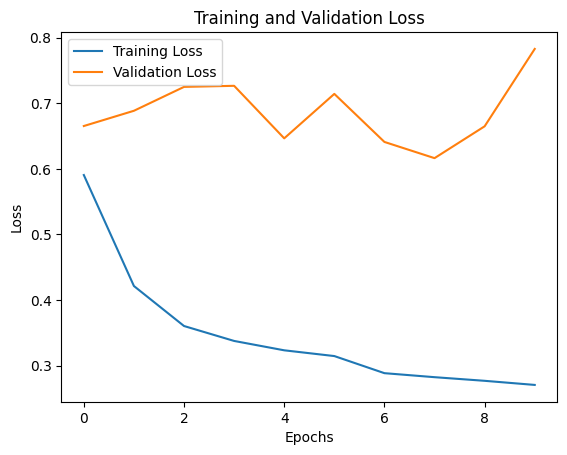

39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 386ms/step - accuracy: 0.7280 - loss: 0.7603
Validation accuracy: 74.41%
Validation loss: 0.7278
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step


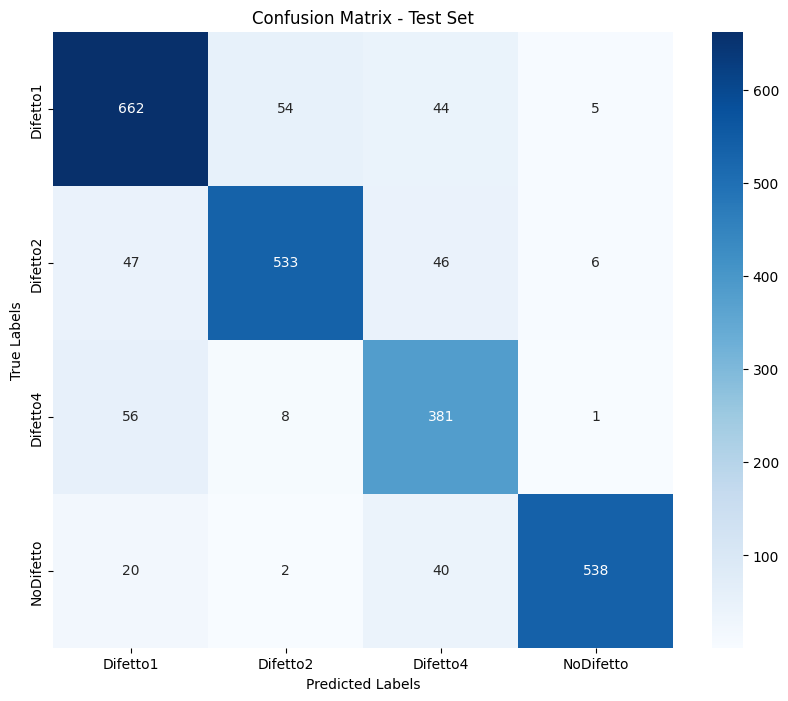

Classification Report - Test Set:
               precision    recall  f1-score   support

    Difetto1       0.84      0.87      0.85       765
    Difetto2       0.89      0.84      0.87       632
    Difetto4       0.75      0.85      0.80       446
   NoDifetto       0.98      0.90      0.94       600

    accuracy                           0.87      2443
   macro avg       0.86      0.86      0.86      2443
weighted avg       0.87      0.87      0.87      2443



In [ ]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Path ke folder dataset
dataset_dir = "/content/RIAWELC_dataset/DB - Copy"  # Path ke dataset
test_dir = "/content/RIAWELC_dataset/DB - Copy/testing"  # Path ke dataset test

# Ukuran gambar dan batch size
img_size = (224, 224)
batch_size = 32

# ImageDataGenerator dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Membagi 20% dari data untuk validasi
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

# Generator untuk data training dan validasi
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, "training"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, "validation"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# Generator untuk data testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  # Disable shuffling for accurate predictions
)

# Menyiapkan MobileNetV2 untuk transfer learning
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Set agar tidak melatih ulang base model

# Membangun model dengan MobileNetV2 sebagai base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation="relu"),
    layers.Dense(train_generator.num_classes, activation="softmax")
])

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Melatih model
history = model.fit(
    train_generator,
    epochs=10,  # Sesuaikan sesuai kebutuhan
    validation_data=validation_generator
)

# Model Summary
model.summary()

# Visualisasi Hasil Training
def plot_training_history(history):
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plot_training_history(history)

# Evaluasi model pada data validasi
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc*100:.2f}%")
print(f"Validation loss: {val_loss:.4f}")

# Fungsi untuk menampilkan Confusion Matrix dan Classification Report
def evaluate_model(generator, generator_name=""):
    y_pred = model.predict(generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = generator.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=generator.class_indices, yticklabels=generator.class_indices)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {generator_name}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {generator_name}:\n", classification_report(y_true, y_pred_classes, target_names=generator.class_indices.keys()))

# Evaluasi pada Validation Set
# evaluate_model(validation_generator, "Validation Set")

# Evaluasi pada Test Set
evaluate_model(test_generator, "Test Set")

# Menyimpan model
model.save("welding_defect_model.h5")

In [ ]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Path ke folder dataset
dataset_dir = "/content/RIAWELC_dataset/DB - Copy"  # Path ke dataset
test_dir = "/content/RIAWELC_dataset/DB - Copy/testing"  # Path ke dataset test

# Ukuran gambar dan batch size
img_size = (224, 224)
batch_size = 32

# ImageDataGenerator dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Membagi 20% dari data untuk validasi
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

# Generator untuk data training dan validasi
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, "training"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, "validation"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# Generator untuk data testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Menyiapkan MobileNetV2 untuk transfer learning
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Set agar tidak melatih ulang base model

# Membangun model dengan MobileNetV2 sebagai base model ditambah beberapa lapisan CNN
# Adjusted the architecture to prevent the negative dimension error
model = models.Sequential([
    base_model,
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Added padding='same'
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'), # Added padding='same'
    layers.BatchNormalization(),
    # Removed one MaxPooling2D layer to keep feature maps larger
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation="softmax")
])


# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Melatih model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Model Summary
model.summary()

# Visualisasi Hasil Training
def plot_training_history(history):
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plot_training_history(history)

# Evaluasi model pada data validasi
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc*100:.2f}%")
print(f"Validation loss: {val_loss:.4f}")

# Fungsi untuk menampilkan Confusion Matrix dan Classification Report
def evaluate_model(generator, generator_name=""):
    y_pred = model.predict(generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = generator.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=generator.class_indices, yticklabels=generator.class_indices)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {generator_name}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {generator_name}:\n", classification_report(y_true, y_pred_classes, target_names=generator.class_indices.keys()))

# Evaluasi pada Validation Set
evaluate_model(validation_generator, "Validation Set")

# Evaluasi pada Test Set
evaluate_model(test_generator, "Test Set")

# Menyimpan model
model.save("welding_defect_model_with_CNN.h5")

Training MobileNetV2...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


397/397 ━━━━━━━━━━━━━━━━━━━━ 196s 454ms/step - accuracy: 0.6548 - loss: 0.9339 - val_accuracy: 0.7178 - val_loss: 0.6523
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 168s 418ms/step - accuracy: 0.7841 - loss: 0.5358 - val_accuracy: 0.7596 - val_loss: 0.5909
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 171s 425ms/step - accuracy: 0.8146 - loss: 0.4846 - val_accuracy: 0.7334 - val_loss: 0.6775
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 170s 421ms/step - accuracy: 0.8188 - loss: 0.4631 - val_accuracy: 0.7728 - val_loss: 0.5931
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 201s 420ms/step - accuracy: 0.8308 - loss: 0.4374 - val_accuracy: 0.7736 - val_loss: 0.6045
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 201s 419ms/step - accuracy: 0.8402 - loss: 0.4145 - val_accuracy: 0.7736 - val_loss: 0.6418
Epoch 7/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 208s 430ms/step - accuracy: 0.8441 - loss: 0.4091 - val_accuracy: 0.7695 - val_loss: 0.6368
Epoch 8/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 168s 417ms/step - accuracy: 0.8451 - loss: 0.40

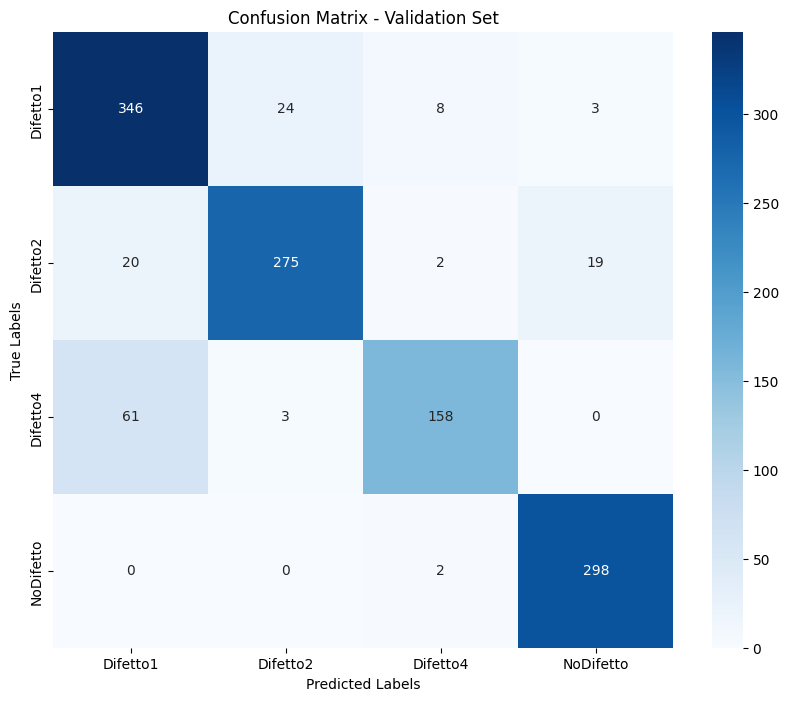

Classification Report - Validation Set:
               precision    recall  f1-score   support

    Difetto1       0.81      0.91      0.86       381
    Difetto2       0.91      0.87      0.89       316
    Difetto4       0.93      0.71      0.81       222
   NoDifetto       0.93      0.99      0.96       300

    accuracy                           0.88      1219
   macro avg       0.90      0.87      0.88      1219
weighted avg       0.89      0.88      0.88      1219

 3/77 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step


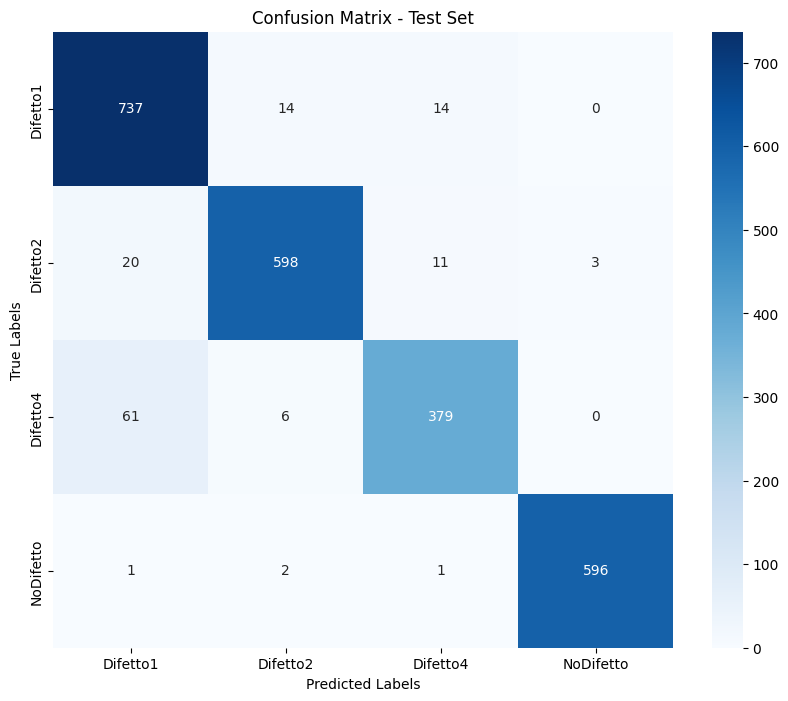

Classification Report - Test Set:
               precision    recall  f1-score   support

    Difetto1       0.90      0.96      0.93       765
    Difetto2       0.96      0.95      0.96       632
    Difetto4       0.94      0.85      0.89       446
   NoDifetto       0.99      0.99      0.99       600

    accuracy                           0.95      2443
   macro avg       0.95      0.94      0.94      2443
weighted avg       0.95      0.95      0.95      2443



In [ ]:
# Import libraries tambahan
from tensorflow.keras.applications import ResNet50, EfficientNetB0, InceptionV3
from tensorflow.keras.applications import MobileNetV2 # Import MobileNetV2

# Menyiapkan base model untuk ResNet50
resnet50_base = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
resnet50_base.trainable = False  # Freeze layers

# Menyiapkan base model untuk EfficientNetB0
efficientnet_base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
efficientnet_base.trainable = False  # Freeze layers

# Menyiapkan base model untuk InceptionV3
inception_base = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
inception_base.trainable = False  # Freeze layers

# Menyiapkan base model untuk MobileNetV2 # Initialize base_model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze layers

# Fungsi untuk membuat model dengan base model tertentu
def create_model(base_model):
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(train_generator.num_classes, activation="softmax")
    ])
    return model

# Membuat model dengan masing-masing base model
mobilenet_model = create_model(base_model)
resnet50_model = create_model(resnet50_base)
efficientnet_model = create_model(efficientnet_base)
inception_model = create_model(inception_base)

# Compile semua model
for m in [mobilenet_model, resnet50_model, efficientnet_model, inception_model]:
    m.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# ... (rest of your code)
# Melatih semua model
histories = {}
for name, model in zip(["MobileNetV2", "ResNet50", "EfficientNetB0", "InceptionV3"],
                       [mobilenet_model, resnet50_model, efficientnet_model, inception_model]):
    print(f"Training {name}...")
    histories[name] = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
    )

# Ensemble model: Menggabungkan output semua model
class EnsembleModel:
    def __init__(self, models):
        self.models = models

    def predict(self, generator):
        predictions = [model.predict(generator) for model in self.models]
        # Rata-rata voting ensemble
        avg_prediction = np.mean(predictions, axis=0)
        return avg_prediction

# Membuat model ensemble
ensemble = EnsembleModel([mobilenet_model, resnet50_model, efficientnet_model, inception_model])

# Evaluasi Ensemble Model
def evaluate_ensemble(generator, generator_name=""):
    y_pred = ensemble.predict(generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = generator.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=generator.class_indices, yticklabels=generator.class_indices)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {generator_name}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {generator_name}:\n", classification_report(y_true, y_pred_classes, target_names=generator.class_indices.keys()))

# Evaluasi pada Validation dan Test Set
evaluate_ensemble(validation_generator, "Validation Set")
evaluate_ensemble(test_generator, "Test Set")

# Menyimpan model ensemble
for name, model in zip(["MobileNetV2", "ResNet50", "EfficientNetB0", "InceptionV3"],
                       [mobilenet_model, resnet50_model, efficientnet_model, inception_model]):
    model.save(f"welding_defect_model_{name}.h5")


Found 12692 images belonging to 4 classes.
Found 1219 images belonging to 4 classes.
Found 2443 images belonging to 4 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training MobileNetV2...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


397/397 ━━━━━━━━━━━━━━━━━━━━ 219s 512ms/step - accuracy: 0.6281 - loss: 0.9449 - val_accuracy: 0.7547 - val_loss: 0.6484
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 194s 482ms/step - accuracy: 0.7709 - loss: 0.5922 - val_accuracy: 0.7424 - val_loss: 0.6095
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 193s 479ms/step - accuracy: 0.7882 - loss: 0.5459 - val_accuracy: 0.7867 - val_loss: 0.5745
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 195s 459ms/step - accuracy: 0.7980 - loss: 0.5129 - val_accuracy: 0.7564 - val_loss: 0.6236
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 189s 466ms/step - accuracy: 0.8138 - loss: 0.4783 - val_accuracy: 0.7810 - val_loss: 0.6051
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 186s 460ms/step - accuracy: 0.8230 - loss: 0.4612 - val_accuracy: 0.7892 - val_loss: 0.5775
Epoch 7/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 201s 457ms/step - accuracy: 0.8319 - loss: 0.4436 - val_accuracy: 0.7719 - val_loss: 0.6204
Epoch 8/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 187s 462ms/step - accuracy: 0.8452 - loss: 0.41

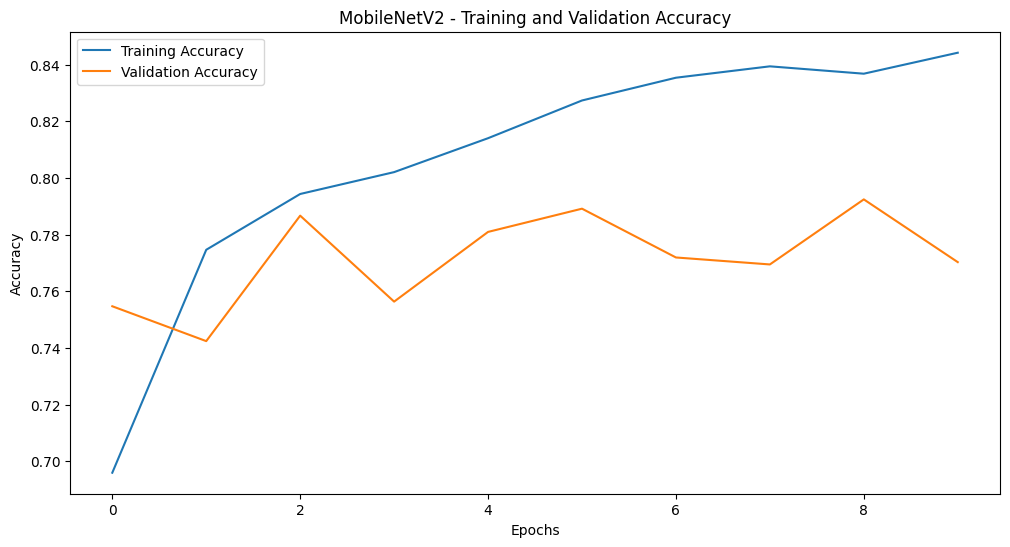

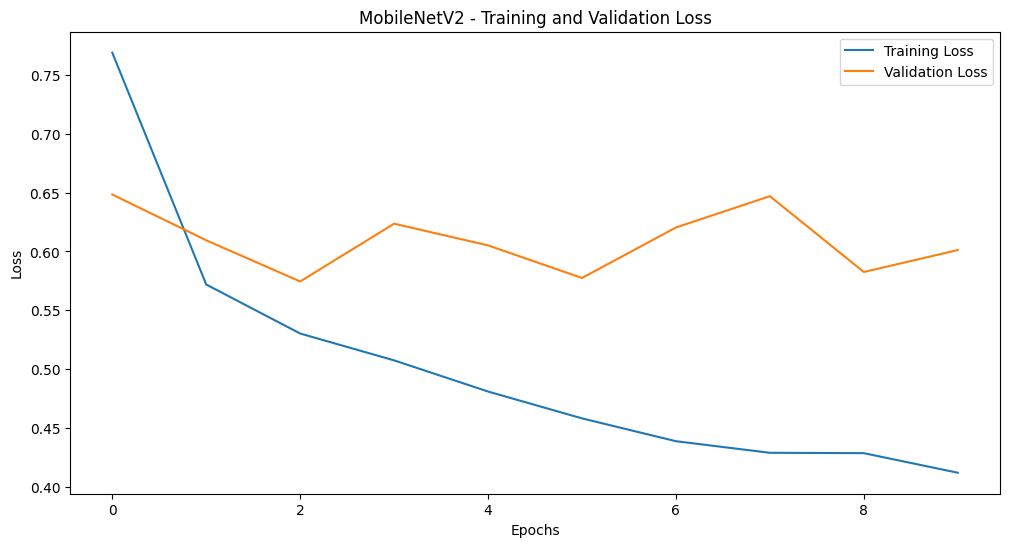

MobileNetV2 - Final Validation Accuracy: 77.03%
MobileNetV2 - Final Validation Loss: 60.12%



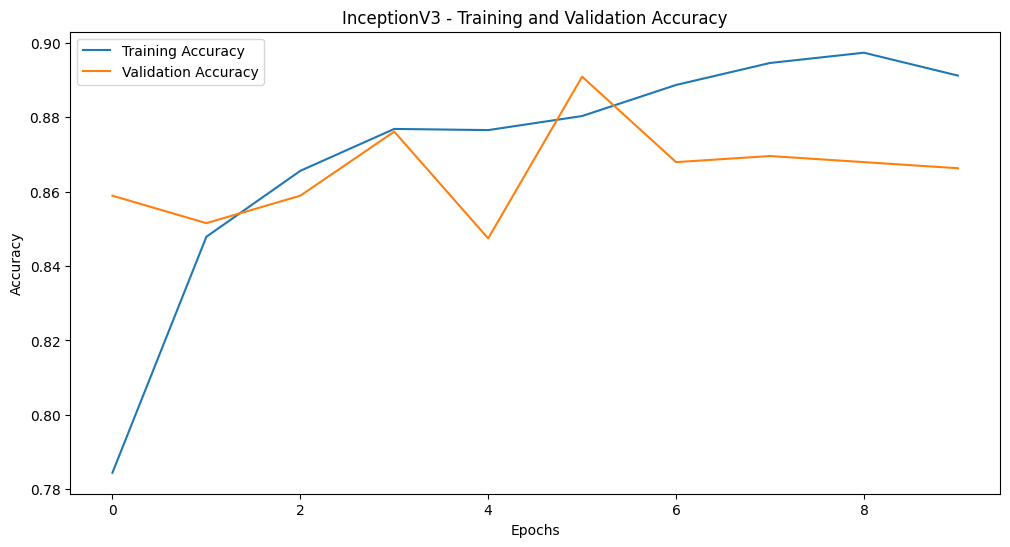

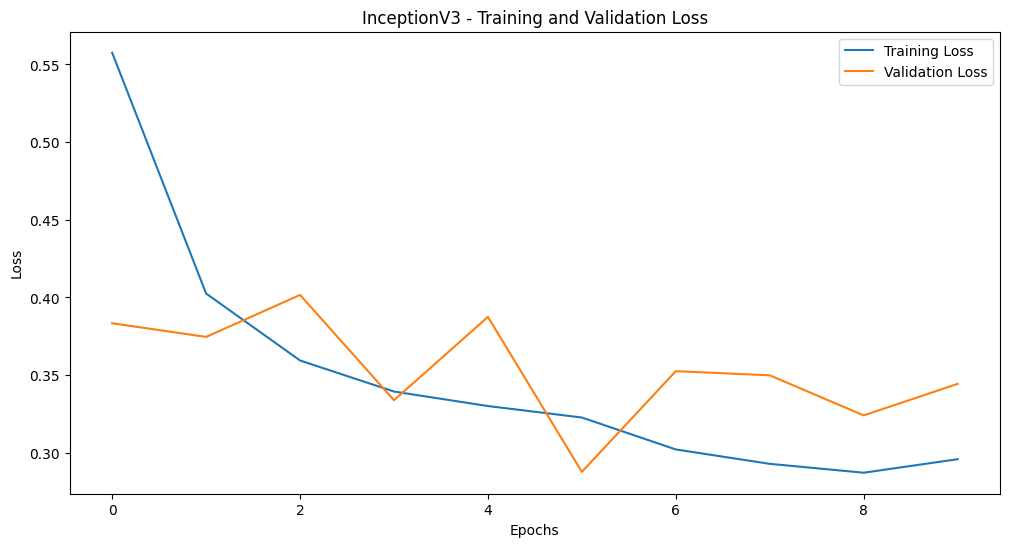

InceptionV3 - Final Validation Accuracy: 86.63%
InceptionV3 - Final Validation Loss: 34.44%



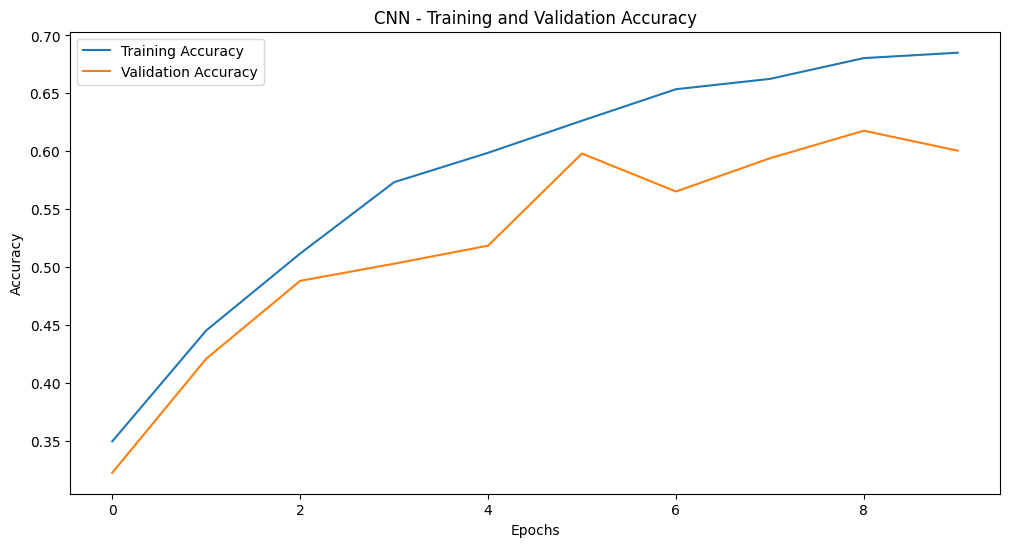

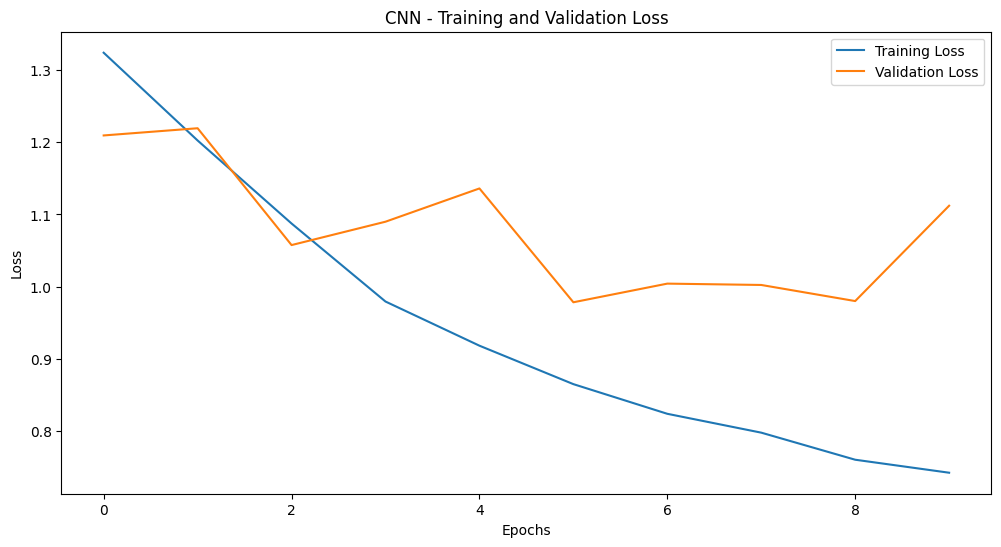

CNN - Final Validation Accuracy: 60.05%
CNN - Final Validation Loss: 111.21%

39/39 ━━━━━━━━━━━━━━━━━━━━ 23s 492ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 27s 564ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 403ms/step


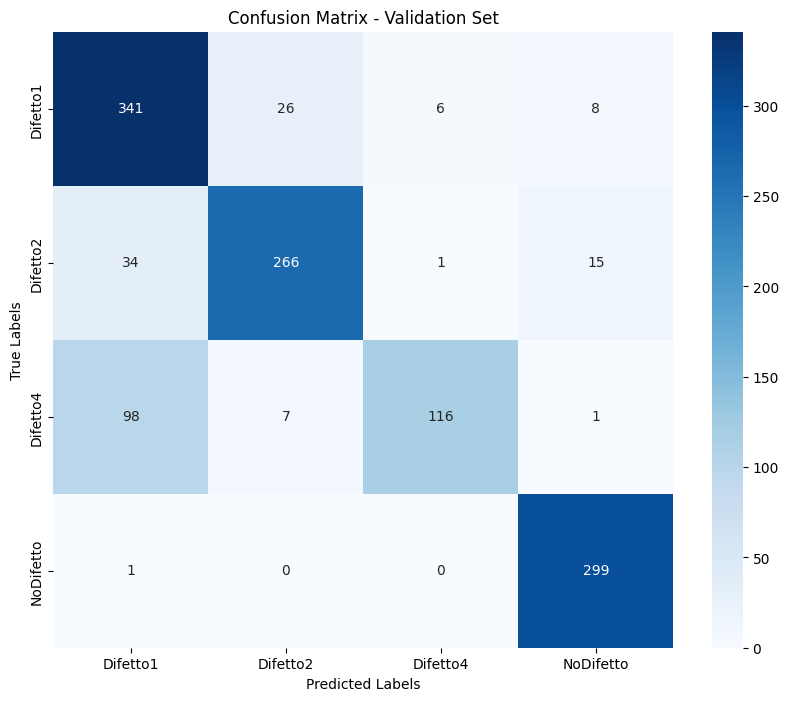

Classification Report - Validation Set:
               precision    recall  f1-score   support

    Difetto1       0.72      0.90      0.80       381
    Difetto2       0.89      0.84      0.87       316
    Difetto4       0.94      0.52      0.67       222
   NoDifetto       0.93      1.00      0.96       300

    accuracy                           0.84      1219
   macro avg       0.87      0.81      0.82      1219
weighted avg       0.86      0.84      0.83      1219

 2/77 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step


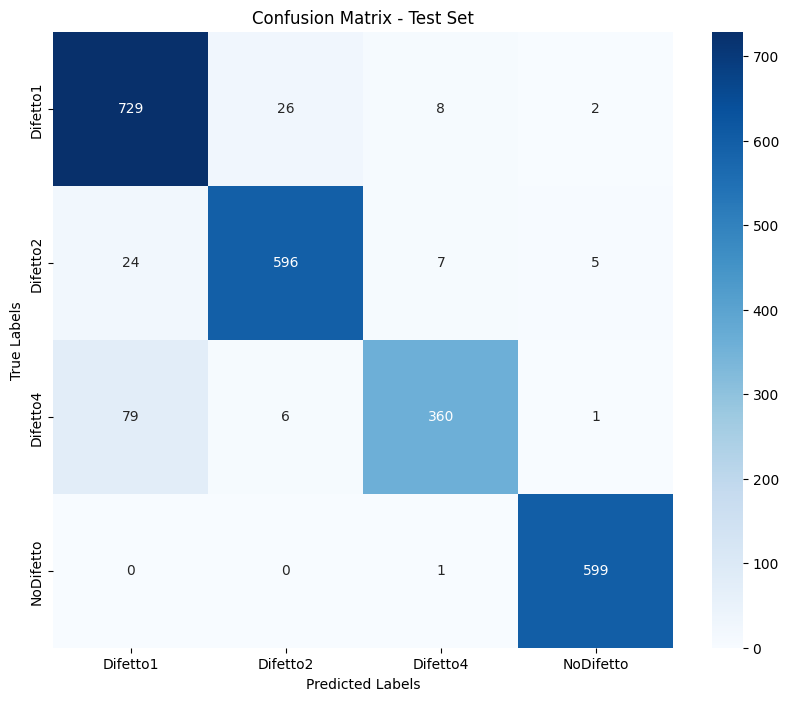

Classification Report - Test Set:
               precision    recall  f1-score   support

    Difetto1       0.88      0.95      0.91       765
    Difetto2       0.95      0.94      0.95       632
    Difetto4       0.96      0.81      0.88       446
   NoDifetto       0.99      1.00      0.99       600

    accuracy                           0.93      2443
   macro avg       0.94      0.93      0.93      2443
weighted avg       0.94      0.93      0.93      2443



In [ ]:
# Import libraries tambahan
from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import os for path manipulation
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator

# Path ke folder dataset
dataset_dir = "/content/RIAWELC_dataset/DB - Copy"  # Path ke dataset
test_dir = "/content/RIAWELC_dataset/DB - Copy/testing"  # Path ke dataset test

# Ukuran gambar dan batch size
img_size = (224, 224)
batch_size = 32

# ImageDataGenerator dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Membagi 20% dari data untuk validasi
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

# Generator untuk data training dan validasi
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, "training"), # Corrected path
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, "validation"), # Corrected path
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# Generator untuk data testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# ... (rest of the code)

# Fungsi untuk membuat model dengan base model tertentu
def create_model(base_model):
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),  # Hidden layer tambahan
        layers.Dropout(0.3),
        layers.Dense(train_generator.num_classes, activation="softmax")
    ])
    return model

# Membuat base model
mobilenet_base = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
inception_base = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze semua base model
for base_model in [mobilenet_base, inception_base]:
    base_model.trainable = False

# Membuat model MobileNetV2 dan InceptionV3
mobilenet_model = create_model(mobilenet_base)
inception_model = create_model(inception_base)

# Membuat model CNN custom
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),  # Hidden layer tambahan
    layers.Dropout(0.3),
    layers.Dense(train_generator.num_classes, activation="softmax")
])

# Compile semua model
models_dict = {
    "MobileNetV2": mobilenet_model,
    "InceptionV3": inception_model,
    "CNN": cnn_model
}

for name, model in models_dict.items():
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Melatih semua model
histories = {}
for name, model in models_dict.items():
    print(f"Training {name}...")
    histories[name] = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
    )

# Fungsi untuk menampilkan grafik training & validation loss/accuracy
def plot_training_history(histories):
    for name, history in histories.items():
        # Plot Training and Validation Accuracy
        plt.figure(figsize=(12, 6))
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f"{name} - Training and Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

        # Plot Training and Validation Loss
        plt.figure(figsize=(12, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f"{name} - Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        # Menampilkan Validation Accuracy dan Loss dalam persen
        val_acc = history.history['val_accuracy'][-1] * 100
        val_loss = history.history['val_loss'][-1] * 100
        print(f"{name} - Final Validation Accuracy: {val_acc:.2f}%")
        print(f"{name} - Final Validation Loss: {val_loss:.2f}%\n")

# Plot history untuk semua model
plot_training_history(histories)

# Ensemble model: Menggabungkan output semua model
class EnsembleModel:
    def __init__(self, models):
        self.models = models

    def predict(self, generator):
        predictions = [model.predict(generator) for model in self.models]
        # Rata-rata voting ensemble
        avg_prediction = np.mean(predictions, axis=0)
        return avg_prediction

# Membuat model ensemble
ensemble = EnsembleModel(list(models_dict.values()))

# Evaluasi Ensemble Model
def evaluate_ensemble(generator, generator_name=""):
    y_pred = ensemble.predict(generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = generator.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=generator.class_indices, yticklabels=generator.class_indices)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {generator_name}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {generator_name}:\n", classification_report(y_true, y_pred_classes, target_names=generator.class_indices.keys()))

# Evaluasi pada Validation dan Test Set
evaluate_ensemble(validation_generator, "Validation Set")
evaluate_ensemble(test_generator, "Test Set")

# Menyimpan model individu
for name, model in models_dict.items():
    model.save(f"welding_defect_model_{name}.h5")
